In [156]:
import numpy as np

a = np.arange(6)

print(a)

[0 1 2 3 4 5]


## Array Slicing 

- Grab  the first three elements
- Grab the last two elements
- Grab the first three elements one apart (every other element)
- Grab the first two elements one apart (every other element)

In [157]:
a[:3]

array([0, 1, 2])

In [158]:
a[-2:]

array([4, 5])

In [159]:
a[::2]

array([0, 2, 4])

In [160]:
a[0:4:2]

array([0, 2])

In [161]:
b = np.arange(15).reshape(3,5)

b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

From the first row, pick the second and the third element.

In [162]:
b[1, 2:4]

array([7, 8])

From the second row pick every other element. 

In [163]:
b[2, ::2]

array([10, 12, 14])

From the second row pick every other element starting from 11.

In [164]:
b[2, 1::2]

array([11, 13])

Grab the second column. 

In [165]:
b[ : , 2]

array([ 2,  7, 12])

Add the second and the third column.

In [166]:
d = b [ : , 1] + b [ : , 2]

d

array([ 3, 13, 23])

Add the second and the third column and write it in the first column of b. 

In [167]:
b [:, 1] = b [ : , 1] + b [ : , 2]

b

array([[ 0,  3,  2,  3,  4],
       [ 5, 13,  7,  8,  9],
       [10, 23, 12, 13, 14]])

In [168]:
b [:, 1] += b[:, 2]

b

array([[ 0,  5,  2,  3,  4],
       [ 5, 20,  7,  8,  9],
       [10, 35, 12, 13, 14]])

Select the the top left 2-by-2 block of b.

In [169]:
b[ :2, :2]

array([[ 0,  5],
       [ 5, 20]])

Select the the bottom right 2-by-3 block of b.

In [170]:
b[ 1: , 2: ]

array([[ 7,  8,  9],
       [12, 13, 14]])

## Universal Functions 



In [171]:
%matplotlib inline
from matplotlib import pyplot

In [172]:
import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

In [173]:
M = numpy.array([[1,-2, 3, 6, 4], [2,3, 1, 5, 0], [1,2,3,40,50]])

print(M)

print(np.argmax(M, axis = 0)) # finds the index of maximums across different columns 
print(np.argmax(M, axis = 1)) # finds the index of maximums across different rows 

# Returns the index max element overal 
print("\narray : ", np.argmax(M))


[[ 1 -2  3  6  4]
 [ 2  3  1  5  0]
 [ 1  2  3 40 50]]
[1 1 0 2 2]
[3 3 4]

array :  14


## Vectors 

we define a *list* with a single vector of coordinates $(2, 2)$, and we use our custom function `plot_vector()` to plot the vector with its tail at four different positions on a 2D coordinate system. 


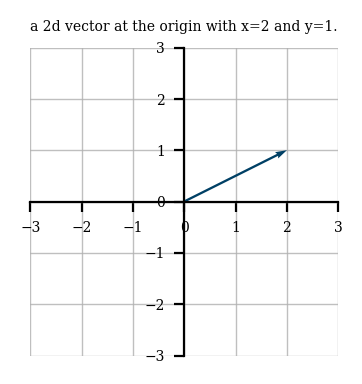

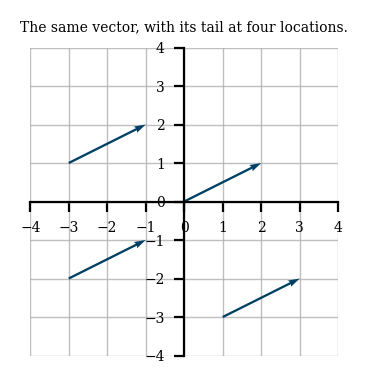

In [174]:
vectors = [(2,1)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors) 
pyplot.title("a 2d vector at the origin with x=2 and y=1.")
plot_vector(vectors, tails)
pyplot.title("The same vector, with its tail at four locations.");

### Adding Vectors

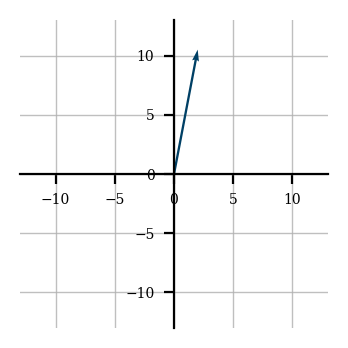

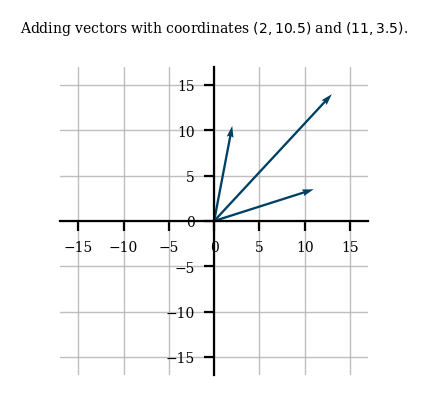

In [175]:
# vector addition
a = numpy.array((2,10.5))
b = numpy.array((11,3.5))

plot_vector([a])
vectors = [a, b, a+b]
plot_vector(vectors)
pyplot.title("Adding vectors with coordinates $(2, 10.5)$ and $(11,3.5)$.\n");

### Scaling Vectors

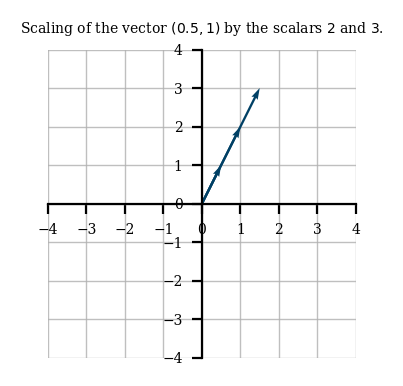

In [176]:
# vector scaling
c = numpy.array((0.5,1))
vectors = [c, 2*c, 3*c]
plot_vector(vectors)
pyplot.title("Scaling of the vector $(0.5,1)$ by the scalars $2$ and $3$.");

### Linear Combination

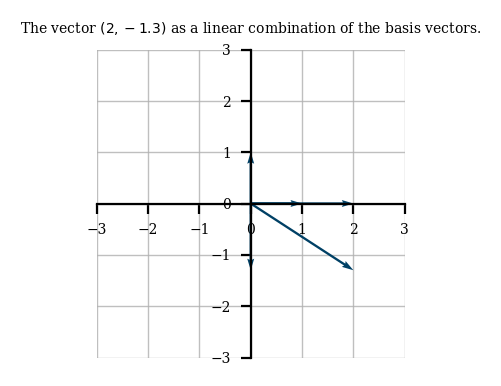

In [177]:
# The standard basis of the 2dim Euclidean plane
i = numpy.array((1,0))
j = numpy.array((0,1))

lin_comb = 2*i + (-1.3)*j
vectors = [i, j, 2*i, (-1.3)*j, lin_comb]
plot_vector(vectors)
pyplot.title("The vector $(2,-1.3)$ as a linear combination of the basis vectors.");

In the code cells below, we will use the NumPy function [`randint`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) to get random integers in an interval (in this case, from $-5$ to $5$). We then create a list of 9 random vectors on the plane via a linear combination of the basis vectors $\mathbf{i}$ and $\mathbf{j}$, and we draw them all.  

In [178]:
from numpy.random import randint

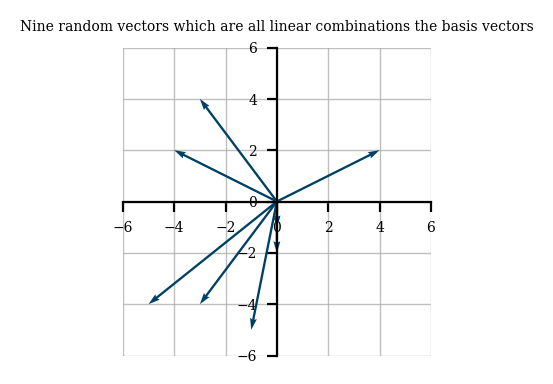

In [179]:
# random span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(9):
    m = randint(-5,5)
    n = randint(-5,5)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
pyplot.title("Nine random vectors which are all linear combinations the basis vectors");

You can imagine that if we created more and more random vectors in this way, eventually we will fill up the 2D plane. Indeed, the *span* of the basis vectors is the whole 2D space. 

In the example below, the new vector $\mathbf{e}$ and $\mathbf{f}$ are _colinear_. Thus, all linear combinations of $\mathbf{e}$ and $\mathbf{f}$ end up on the same line. Therefore, the space spanned by vectors $\mathbf{e}$ and $\mathbf{f}$ is one-dimensional. 

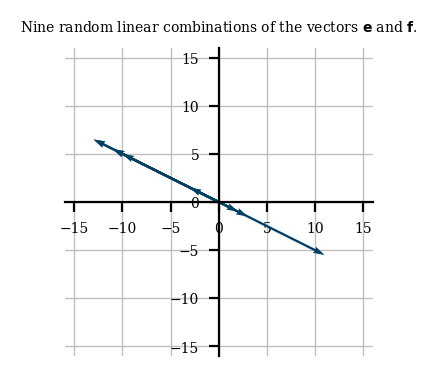

In [180]:
e = numpy.array((2, -1))
f = numpy.array((-1,0.5))

vectors = []
for _ in range(9):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*e + n*f)
    
plot_vector(vectors)
pyplot.title("Nine random linear combinations of the vectors $\mathbf{e}$ and $\mathbf{f}$.");

##### Definition:

> A **basis** for a vector space is a set of _linearly independent_ vectors that _span_ that space.

In a set of linearly independent vectors, no one vector can be written as a linear combination of the others.

### Matrices with NumPy

We can define a NumPy array to represent a matrix.

In [181]:
A = numpy.array([[1,1], [-1,1]])

print(A)

[[ 1  1]
 [-1  1]]


In [182]:
b = numpy.array((2,1))

A * b

array([[ 2,  1],
       [-2,  1]])

Clearly, this does not act as the action $A$ with of the matrix on the vector $b$ given by the dot product. For the multiplication $A \, b$ we use `.dot` function. 

Recall that 

$$A \, b = 2 A_1 + 1 A_2$$

where 
$$
A_1 = \left[ \begin{array}{c} 1 \\ -1 \end{array} \right] \quad \text{and} \quad A_2 = \left[ \begin{array}{c} 1 \\ 1 \end{array} \right]
$$

In [183]:
A.dot(b)

array([ 3, -1])

The product with the first basis vector $i$ returns the first column of $A$. 

In [184]:
A.dot(i)

array([ 1, -1])

In [185]:
A.dot(j)

array([1, 1])

## Matrices as Linear Transformations

Every vector 

$$ 
\left[ \begin{array}{c} x_1 \\ x_2  \end{array} \right] 
$$
is a real combination of the basis vectors i and j. 
Therefore, 

$$ 
A x = A (x_1 i + x_2 j) = x_1 (A i) + x_2 (A j)
$$.

But, we know what $A i$ and $A j$ are. Hence, 

$$ A x = x_1 \left[ \begin{array}{c} 1 \\ -1  \end{array} \right] + x_2 \left[ \begin{array}{c} 1 \\ 1  \end{array} \right]  $$

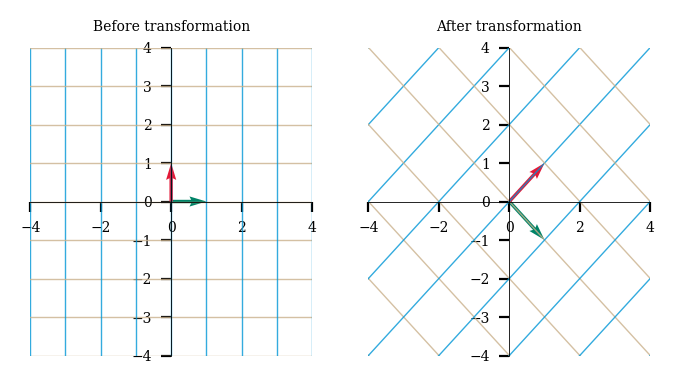

In [211]:
plot_linear_transformation(A)

You see that the transformation $A$ is a **45-degree clockwise rotation**, plus a **scaling** by a factor that stretched the vectors $\mathbf{i}$ and $\mathbf{j}$ (shown in green and red) into vectors of more length. 

How much is the scaling factor?

 

> The **Euclidean norm** of a 2D vector $v$ is given by $||\mathbf{v}||= \sqrt{x^2 + y^2}$, where $(x,y)$ are its coordinates. This definition generalizes to any dimension by adding all squared components under the square root.

The NumPy sub-package [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#module-numpy.linalg) contains many useful functions, including one to compute the norm of a vector (or matrix). 

In [187]:
numpy.linalg.norm(i)

a = A.dot(i)

b = A.dot(j)

a_norm = numpy.linalg.norm(a)

b_norm = numpy.linalg.norm(b)

print(a_norm)

print(b_norm)

scaling_factor = a_norm / numpy.linalg.norm(i)

print (scaling_factor)


1.4142135623730951
1.4142135623730951
1.4142135623730951


To see what the transformation does to _one particular vector_, we can use our custom function `plot_vector` again, using the vector and its transformed self.

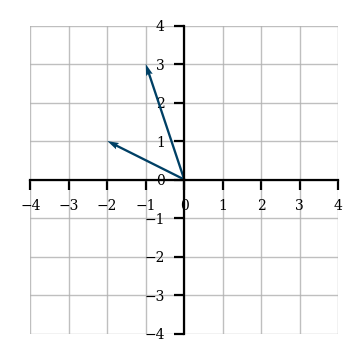

In [188]:
x = numpy.array((-2,1))

vectors = [x, A.dot(x)]
plot_vector(vectors)

The inverse matrix $A^{-1}$ corresponds to the reverse transformation. The equation 

$$ A^{-1} \, A = I$$ 

says that the action of $A^{-1}$ cancels the action of $A$. 

[[ 0.5 -0.5]
 [ 0.5  0.5]]


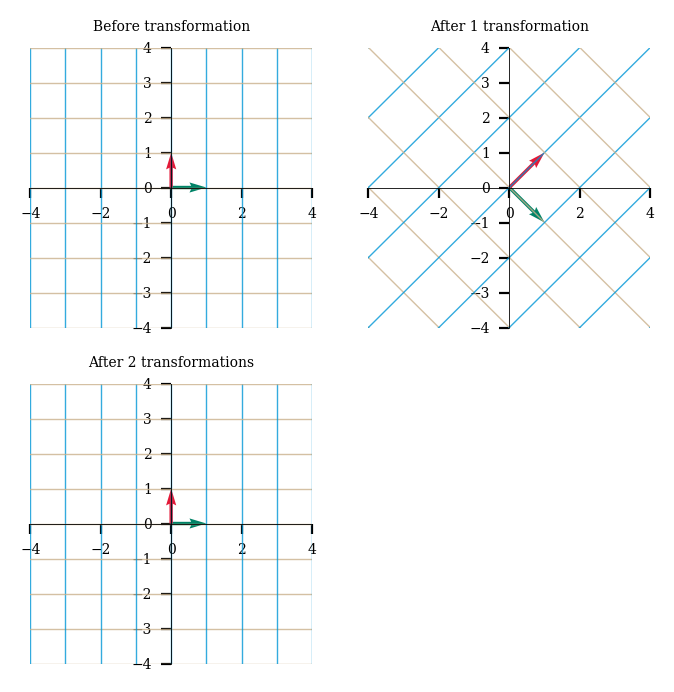

In [189]:
from numpy.linalg import inv
A_inv = inv(A)
print (A_inv)
plot_linear_transformations(A, A_inv)

Let's visualize the action of $A^{-1}$ in isolation:

[[ 0.5 -0.5]
 [ 0.5  0.5]]


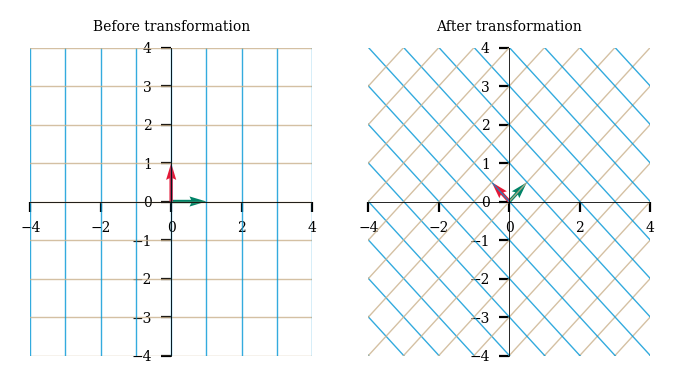

In [190]:
print(A_inv)

plot_linear_transformation (A_inv)

Action of $A$ = clock-wise rotation by 45 degree and scaling by factor of 2.

Action of $A^{-1}$ = a counter clock-wise rotation by 45 degrees and a scaling by factor of 1/2. 

In [191]:
from numpy.linalg import norm
norm (inv(A).dot(i))

0.7071067811865476

## Matrices as Change of Basis

Suppose we need to express the vector $\mathbf{v}= \begin{bmatrix} 3 \\ 0 \end{bmatrix}$ as a linear combination of

$$
\mathbf{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix},  \quad
\mathbf{b} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}  
$$

Put $\mathbf{a}$ and $\mathbf{b}$ into the matrix 
$$U = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$$

We want to find $\mathbf{x}$ such that $ U x = x_1 \mathbf{a} + x_2 \mathbf{b} = \begin{bmatrix} 3 \\ 0 \end{bmatrix} = 3 \mathbf{i} $. 

Since $U$ is of full rank this equation has a solution. 



In [192]:
U =np.array([[2, 1],[1, 2]])
print(U)
v = numpy.array([3,0])
x = numpy.linalg.solve(U, v) # this is the same as inv(U).dot v
print(x)


[[2 1]
 [1 2]]
[ 2. -1.]


The vector $\mathbf{v}$ has coordinates $(2,-1)$ in the new basis $\mathbf{a}$ and $\mathbf{b}$. 

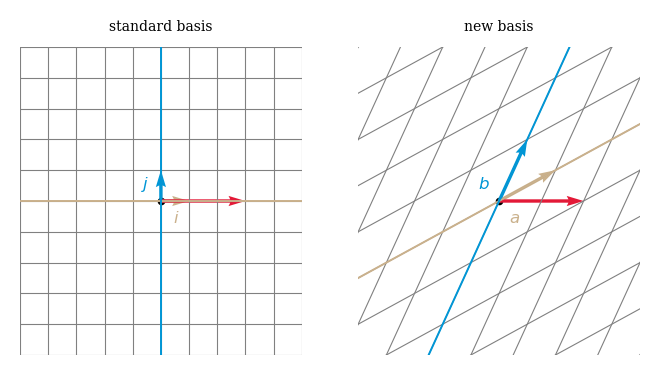

In [193]:
a = numpy.array([2,1])
b = numpy.array([1,2])
plot_change_basis(a, b, v)

consider the 90-degree rotation, $R$:
$$ R = \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix} $$


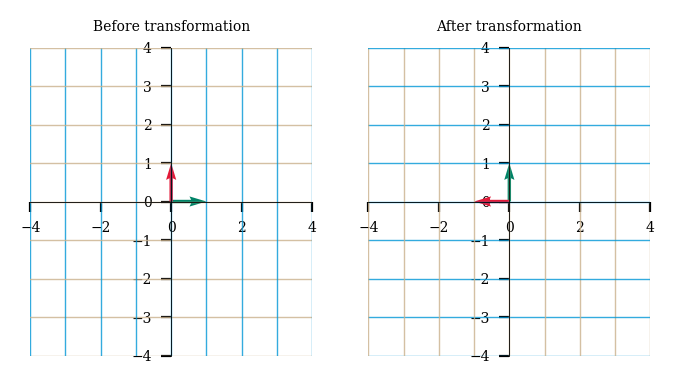

In [194]:
R = np.array([[0,-1],[1,0]])
plot_linear_transformation(R)

$R$ take the basis vector $\mathbf{i}$ to $\mathbf{j}$ and takes $\mathbf{j}$ to $-\mathbf{i}$. 

Question: How does $R$ transform vectors expressed in the new basic $\mathbf{a}$ and $\mathbf{b}$? This leads us to the concept of matrix __conjugation__. We would need to first change the representation of the vector to the standard basis (multiplying by $U$), then apply the transformation $R$, then change back to the new basis by applying $U^{-1}$. All in all we need $U^{-1}\,R\, U \,\mathbf{x}$.

array([-3.,  3.])

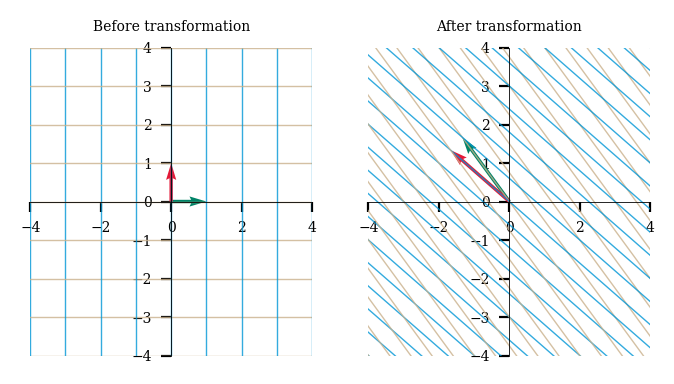

In [195]:
U_inv = inv(U)
plot_linear_transformation(U_inv @ R @ U)
S = U_inv @ R @ U
c = np.array((1,1))
S.dot(c)




## Matrices as systems of equations

The most fundamental problem of linear algebra is to find the vector $\mathbf{x}$ such that 

$$ M \mathbf{x}=\mathbf{b} $$

Take, for example, 
$$M = \begin{bmatrix} 1 & -2 \\ 2 & 3 \end{bmatrix}$$

and $\mathbf{b} = \begin{bmatrix} 1 \\ 9 \end{bmatrix}$ and the components of $\mathbf{x}$ as $(x_0, x_1)$. 

The vector $\mathbf{x}$ lands on $\mathbf{b}$ via the transformation $M$—that is, via the matrix-vector multiplication, which means a linear combination of the columns of $M$ weighted by the components of $\mathbf{x}$:

$$M \mathbf{x}= x_0 \begin{bmatrix} 1 \\ 2 \end{bmatrix}+ x_1 \begin{bmatrix} -2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 9 \end{bmatrix}$$

In [196]:
M = numpy.array([[1,-2], [2,3]])

print(M)

[[ 1 -2]
 [ 2  3]]


We have seen that since the matrix $M$ has full rank it is invertible and therefore we can use the inverse linear transformation $M^{-1}$ to find $x$. We can do this in NumPy:

In [197]:
b = numpy.array([1,9])

x = inv(M).dot(b)

print(x)

[3. 1.]


The vector $\mathbf{x}$ is the **solution** of the linear system of equations. 

$$
\begin{align*}
x - 2 y &= 1 \\
2 x + 3 y &= 9
\end{align*}
$$

We can isolate $y$, and  obtain two line equations: 

$$
\begin{align*}
y &= 1/2 x - 1/2 \\
y &= -2/3 x + 3
\end{align*}
$$


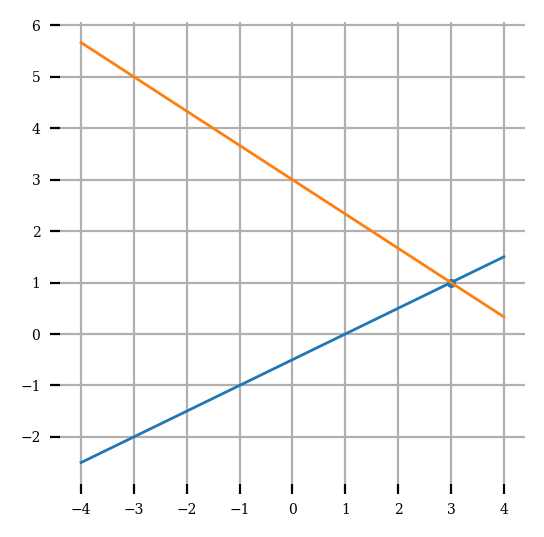

In [199]:
xvalues = numpy.linspace(-4,4) # specifies the grid dimensions 
m1, b1, m2, b2 = 1/2, -1/2, -2/3, 3

pyplot.figure(figsize=(3,3))
pyplot.plot(xvalues, m1*xvalues+b1)
pyplot.plot(xvalues, m2*xvalues+b2)
pyplot.scatter(x[0],x[1], s=5)
pyplot.box(False)
pyplot.grid(True);

The two lines intersect exactly at the point $(3, 1)$ which is the solution of the equation $M x = b$. 

NumPy also has a built-in function to solve a linear system of equations:  [`numpy.linalg.solve()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)—we give it the matrix, and the known vector on the right-hand side of the equation:


In [ ]:
x = np.linalg.solve(M, b)
print(x)

[[ 1 -2]
 [ 2  3]]
[3. 1.]


### Another Example: The Case of Singular Matrices 

Suppose we have a different matrix 
$$N = \begin{bmatrix}  2 & -1 \\  -1 & 0.5 \end{bmatrix} $$
and we are interested in finding the solutions $x$ for which 
$$N x = b$$ 
where $b$ is 
$$ \begin{bmatrix} 1 \\ 5 \end{bmatrix}$$

In [ ]:
N = numpy.array([[2,-1], [-1,0.5]])
print(N)

[[ 2.  -1. ]
 [-1.   0.5]]


If we tried to solve it with `linalg.solve(N, b)` we get the following error: 

```Python
LinAlgError: Singular matrix
```

This is because the matrix $N$ has rank 1 (the dimension of the column space of $N$ is 1 since the column vectors are colinear) and therefore $N$ is singular which means we cannot use the inverse of $N$ -- which does not exists -- to solve the equation $N x = b$.  

If we plot the system of equations associated to $N x = b$ we get the following figure:  

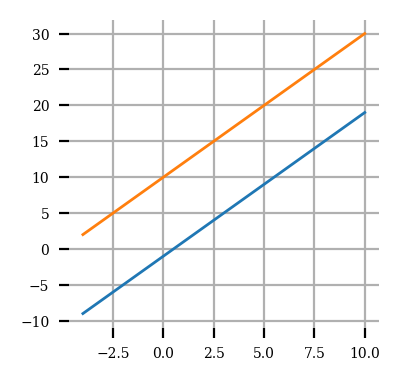

In [203]:
xvalues = numpy.linspace(-4,10)
m1, b1, m2, b2 = 2, -1, 2, 10

pyplot.figure(figsize=(2,2))
pyplot.plot(xvalues, m1*xvalues+b1)
pyplot.plot(xvalues, m2*xvalues+b2)
pyplot.box(False)
pyplot.grid(True);

Of course these lines are parallel and they are not going to meet. Hence, we have no solution to the system of equations $N x = b$: This is the geometric understanding of the fact that $N$ is singular.  

## Geometric Understanding of Linear Transformation 



The matrix 

$$C = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$$

transforms a circle to an ellipse.

[[2 1]
 [1 2]]


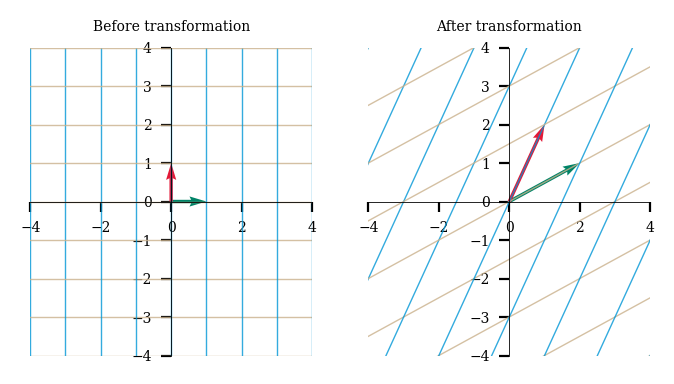

In [212]:
C = numpy.array([[2,1], [1,2]])
print(C)
plot_linear_transformation(C)


To visualize the effect of this matrix, let's plot a bunch of vectors of unit length, their heads together tracing a unit circle.
We start by creating an array of angles for these vectors, which we want to go around the origin from $0$ to $2\pi$.

In [205]:
alpha = numpy.linspace(0, 2*numpy.pi, 21)

print (alpha)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604 6.28318531]


In [206]:
my_vectors = list(zip(numpy.cos(alpha), numpy.sin(alpha)))

print (my_vectors)

[(1.0, 0.0), (0.9510565162951535, 0.3090169943749474), (0.8090169943749475, 0.5877852522924731), (0.5877852522924732, 0.8090169943749473), (0.30901699437494745, 0.9510565162951535), (6.123233995736766e-17, 1.0), (-0.30901699437494734, 0.9510565162951536), (-0.587785252292473, 0.8090169943749475), (-0.8090169943749473, 0.5877852522924732), (-0.9510565162951535, 0.3090169943749475), (-1.0, 1.2246467991473532e-16), (-0.9510565162951536, -0.3090169943749473), (-0.8090169943749475, -0.587785252292473), (-0.5877852522924732, -0.8090169943749473), (-0.30901699437494756, -0.9510565162951535), (-1.8369701987210297e-16, -1.0), (0.30901699437494723, -0.9510565162951536), (0.5877852522924729, -0.8090169943749476), (0.8090169943749473, -0.5877852522924732), (0.9510565162951535, -0.3090169943749476), (1.0, -2.4492935982947064e-16)]


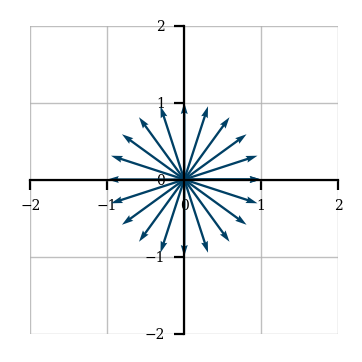

In [207]:
plot_vector(my_vectors)

In [208]:
my_vectors[0]

(1.0, 0.0)

In [209]:
my_vectors[1]

(0.9510565162951535, 0.3090169943749474)

In [213]:
C.dot(numpy.array(my_vectors[0]))

array([2., 1.])

We next apply the transformation $C$ to all the vectors in our list `my_vectors`, using a `for` statement, and we plot the transformed vectors.

In [214]:
my_new_vectors = []
for i in range(len(my_vectors)):
    my_new_vectors.append(C.dot(numpy.array(my_vectors[i])))
    

In [215]:
print(my_new_vectors)

[array([2., 1.]), array([2.21113003, 1.56909051]), array([2.20581924, 1.9845875 ]), array([1.9845875 , 2.20581924]), array([1.56909051, 2.21113003]), array([1., 2.]), array([0.33302253, 1.59309604]), array([-0.36655351,  1.03024874]), array([-1.03024874,  0.36655351]), array([-1.59309604, -0.33302253]), array([-2., -1.]), array([-2.21113003, -1.56909051]), array([-2.20581924, -1.9845875 ]), array([-1.9845875 , -2.20581924]), array([-1.56909051, -2.21113003]), array([-1., -2.]), array([-0.33302253, -1.59309604]), array([ 0.36655351, -1.03024874]), array([ 1.03024874, -0.36655351]), array([1.59309604, 0.33302253]), array([2., 1.])]


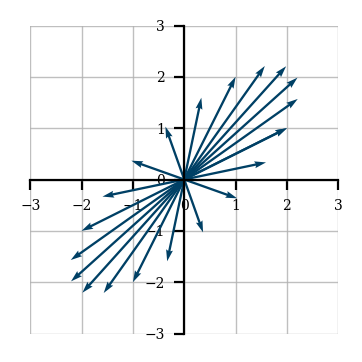

In [216]:
plot_vector(my_new_vectors)

Our new vectors trace an ellipse which has its major axis along the 45-degree line. 
We can get an approximation to its _semi-major_ and _semi-minor_ axes by finding the longest and shortest vectors in this new set. 
We can use the `numpy.linalg.norm()` function for this.


In [217]:
vec_lengths = []
for i in range(len(my_new_vectors)):
    vec_lengths.append((my_new_vectors[i], numpy.linalg.norm(my_new_vectors[i])))
print (vec_lengths) 



[(array([2., 1.]), 2.23606797749979), (array([2.21113003, 1.56909051]), 2.7112987679652516), (array([2.20581924, 1.9845875 ]), 2.9671916124815088), (array([1.9845875 , 2.20581924]), 2.9671916124815083), (array([1.56909051, 2.21113003]), 2.711298767965252), (array([1., 2.]), 2.23606797749979), (array([0.33302253, 1.59309604]), 1.6275315636970324), (array([-0.36655351,  1.03024874]), 1.093514487704386), (array([-1.03024874,  0.36655351]), 1.0935144877043859), (array([-1.59309604, -0.33302253]), 1.6275315636970322), (array([-2., -1.]), 2.2360679774997894), (array([-2.21113003, -1.56909051]), 2.711298767965252), (array([-2.20581924, -1.9845875 ]), 2.9671916124815083), (array([-1.9845875 , -2.20581924]), 2.9671916124815083), (array([-1.56909051, -2.21113003]), 2.711298767965252), (array([-1., -2.]), 2.23606797749979), (array([-0.33302253, -1.59309604]), 1.627531563697033), (array([ 0.36655351, -1.03024874]), 1.0935144877043863), (array([ 1.03024874, -0.36655351]), 1.0935144877043859), (arra

In the code below we find 
- what is the norm of semi_major vector (the longest axis of the ellipse)
- what is the index of the semi_major vector in the 21 long list above 
- the semi_major vector itself. 

In [218]:
lengths = [] 
for i in range(len(my_new_vectors)): 
        lengths.append(numpy.linalg.norm(my_new_vectors[i]))

semi_major = max(lengths)
semi_major_index = np.argmax(lengths)
print(semi_major)
print(semi_major_index)
print(vec_lengths[semi_major_index][0]) 

2.9671916124815088
2
[2.20581924 1.9845875 ]


In [219]:
semi_minor = min(lengths)
print(semi_minor)

1.0935144877043859


We know that the length of semi-major vector is $2.9671916124815088$ and we know that it is 45 degrees away from the x-axis (counter-clockwise). Therefore, we can find its x and y coordinates by dividing the length by $\sqrt{2}$. 

Next, we find out which vector it was that was mapped to the semi-major $\mathbf{u}_1$, i.e. we are looking for the vector $\mathbf{v}_1$ such that $C\,\mathbf{v}_1 = \mathbf{u}_1$. For this we use the inverse matrix $C^{-1}$.

$$\mathbf{v}_1=C^{-1}\mathbf{u}_1$$ 

[2.09812131 2.09812131]
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


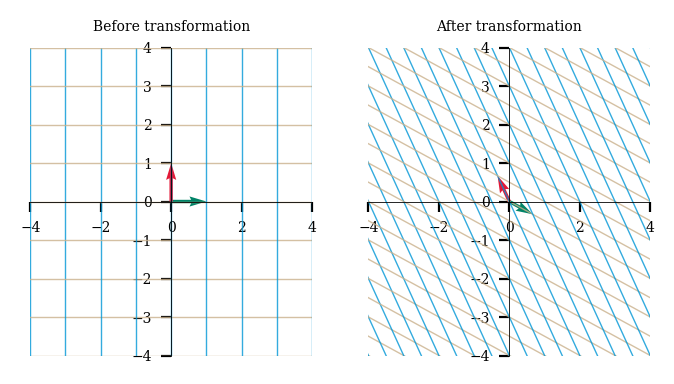

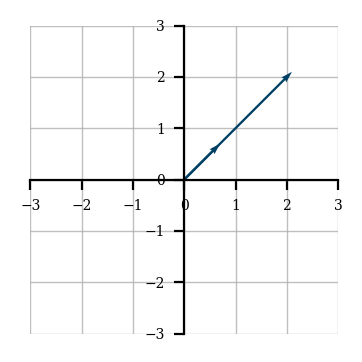

In [220]:
u1 = numpy.array([semi_major/numpy.sqrt(2), semi_major/numpy.sqrt(2)])

print(u1)

C_inv = numpy.linalg.inv(C)
print (C_inv)
plot_linear_transformation(C_inv)

v1 = C_inv.dot(u1)
plot_vector([u1,v1])

The effect of the matrix on this vector is just to scale it. 

$$C\,\mathbf{v}_1 = s_1 \mathbf{v}_1$$

In other words, $\mathbf{v}_1$ is simply an __eigenvector__ for the linear transformation $C$.

Let's now look at one of the vectors along the semi-minor axis (we pick the one pointing right and down), and repeat this process.

[ 0.77323151 -0.77323151]
[ 0.77323151 -0.77323151]
1.0935144877043859
1.0935144877043859


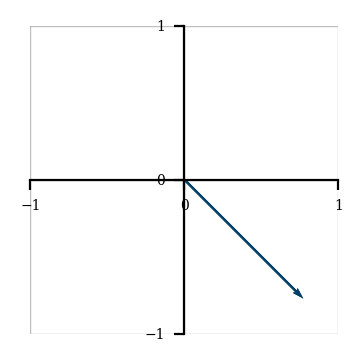

In [221]:
u2 = numpy.array([semi_minor/numpy.sqrt(2), -semi_minor/numpy.sqrt(2)])
print(u2)

v2 = C_inv.dot(u2)
print(v2)
plot_vector([u2,v2])

print(np.linalg.norm(u2))
print(np.linalg.norm(v2))

$v_2$ is another eigenvector for $C$: The effect of the matrix $M$ on the vector $\mathbf{v}_2$ is _also_ just to scale it, and the scaling factor is $1$. Indeed, $v_2$ is a fix-point of $C$. 

$$ C v_2 = v_2$$

## More on Eigenvectors

> The __eigenvectors__ of a linear transformations are the vectors that don't change direction after the application of the linear transformation.